<a href="https://colab.research.google.com/github/Kennethfargose/Time-Series-Analysis/blob/main/BlockedRNN_m5_cal_food%26h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# To prevent from memory explode. We should apply downcast function to every dataframe we created.
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_csvs(path_sales_train_evaluation, path_calendar, path_sell_prices):
    train_df = pd.read_csv(path_sales_train_evaluation)
    calendar = pd.read_csv(path_calendar)
    prices = pd.read_csv(path_sell_prices)
    return train_df, calendar, prices

In [ ]:
path_sales_train = r'/content/drive/MyDrive/m5-forecasting-accuracy.zip (Unzipped Files)/sales_train_evaluation.csv'
path_calendar = r'/content/drive/MyDrive/m5-forecasting-accuracy.zip (Unzipped Files)/calendar.csv'
path_sell_prices = r'/content/drive/MyDrive/m5-forecasting-accuracy.zip (Unzipped Files)/sell_prices.csv'
train_df, calendar, prices = read_csvs(path_sales_train, path_calendar, path_sell_prices)

FileNotFoundError: ignored

In [ ]:
train_df = pd.read_csv(r'C:\Data_UnBackupped\fargok01\Downloads\m5-forecasting-accuracy\sales_train_evaluation.csv')
calendar = pd.read_csv(r'C:\Data_UnBackupped\fargok01\Downloads\m5-forecasting-accuracy\calendar.csv')
prices = pd.read_csv(r'C:\Data_UnBackupped\fargok01\Downloads\m5-forecasting-accuracy\sell_prices.csv')


In [ ]:
cal_df = downcast_dtypes(calendar)

print(cal_df.shape)
print(cal_df.info())
cal_df.head()

(1969, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int16 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int16 
 4   month         1969 non-null   int16 
 5   year          1969 non-null   int16 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int16 
 12  snap_TX       1969 non-null   int16 
 13  snap_WI       1969 non-null   int16 
dtypes: int16(7), object(7)
memory usage: 134.7+ KB
None


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
sales_df = downcast_dtypes(train_df)
print(sales_df.shape)
print(sales_df.info())
sales_df.head()

(30490, 1947)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int16(1941), object(6)
memory usage: 114.3+ MB
None


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [ ]:
sell_prices_df = downcast_dtypes(prices)
print(sell_prices_df.shape)
print(sell_prices_df.info())
sell_prices_df.head()

(6841121, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int16  
 3   sell_price  float32
dtypes: float32(1), int16(1), object(2)
memory usage: 143.5+ MB
None


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
# WI_df= downcast_dtypes((sales_df[sales_df['state_id'] == 'WI']).copy())
# WI_df.info()
# WI_df.tail()

CA_df = downcast_dtypes((sales_df[sales_df['state_id'] == 'CA']).copy())

CA_df.info()
CA_df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12196 entries, 0 to 12195
Columns: 1947 entries, id to d_1941
dtypes: int16(1941), object(6)
memory usage: 45.8+ MB


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
12191,FOODS_3_823_CA_4_evaluation,FOODS_3_823,FOODS_3,FOODS,CA_4,CA,1,1,1,4,...,1,1,2,0,3,2,1,1,1,0
12192,FOODS_3_824_CA_4_evaluation,FOODS_3_824,FOODS_3,FOODS,CA_4,CA,0,0,0,1,...,1,0,1,0,0,2,0,4,0,0
12193,FOODS_3_825_CA_4_evaluation,FOODS_3_825,FOODS_3,FOODS,CA_4,CA,2,3,2,1,...,1,0,1,1,0,2,1,1,1,0
12194,FOODS_3_826_CA_4_evaluation,FOODS_3_826,FOODS_3,FOODS,CA_4,CA,0,0,0,0,...,1,2,2,2,2,2,0,2,2,4
12195,FOODS_3_827_CA_4_evaluation,FOODS_3_827,FOODS_3,FOODS,CA_4,CA,0,0,0,0,...,1,8,2,16,4,3,4,5,4,0


In [ ]:
# # Then melt it to make each day into row
# WI_df_melted = downcast_dtypes(WI_df.melt(id_vars=['id','item_id', 'dept_id',
#                                                      'cat_id', 'store_id',
#                                                      'state_id']))
# WI_df_melted.rename({'variable':'day', 'value':'qty'}, axis=1, inplace=True)
# WI_df_melted.info()
# WI_df_melted.head()

In [ ]:
# Then melt it to make each day into row
CA_df_melted = downcast_dtypes(CA_df.melt(id_vars=['id','item_id', 'dept_id',
                                                     'cat_id', 'store_id',
                                                     'state_id']))
CA_df_melted.rename({'variable':'day', 'value':'qty'}, axis=1, inplace=True)
CA_df_melted.info()
CA_df_melted.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23672436 entries, 0 to 23672435
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   id        object
 1   item_id   object
 2   dept_id   object
 3   cat_id    object
 4   store_id  object
 5   state_id  object
 6   day       object
 7   qty       int16 
dtypes: int16(1), object(7)
memory usage: 1.3+ GB


,id,item_id,dept_id,cat_id,store_id,state_id,day,qty
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [ ]:
#WI_df_joined = downcast_dtypes(pd.merge(cal_df, WI_df_melted, how='right',
#                           left_on='d', right_on='day'))
# WI_df_joined = downcast_dtypes(pd.merge(WI_df_joined, sell_prices_df, how='left',
#                           on=['store_id', 'item_id', 'wm_yr_wk']))
# # And not forget to drop snap_WI and snap_TX column
# WI_df_joined.drop(columns=['snap_TX', 'snap_WI'])
# WI_df_joined.info()
# WI_df_joined.tail()

downcast it once, downcast after reading the data

In [ ]:
# Then join it with sell prices and calendar dataframe
CA_df_joined = downcast_dtypes(pd.merge(cal_df, CA_df_melted, how='right',
                          left_on='d', right_on='day'))
CA_df_joined = downcast_dtypes(pd.merge(CA_df_joined, sell_prices_df, how='left',
                          on=['store_id', 'item_id', 'wm_yr_wk']))
# And not forget to drop snap_WI and snap_TX column
CA_df_joined.drop(columns=['snap_TX', 'snap_WI'])
CA_df_joined.info()
CA_df_joined.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23672436 entries, 0 to 23672435
Data columns (total 23 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   wm_yr_wk      int16  
 2   weekday       object 
 3   wday          int16  
 4   month         int16  
 5   year          int16  
 6   d             object 
 7   event_name_1  object 
 8   event_type_1  object 
 9   event_name_2  object 
 10  event_type_2  object 
 11  snap_CA       int16  
 12  snap_TX       int16  
 13  snap_WI       int16  
 14  id            object 
 15  item_id       object 
 16  dept_id       object 
 17  cat_id        object 
 18  store_id      object 
 19  state_id      object 
 20  day           object 
 21  qty           int16  
 22  sell_price    float32
dtypes: float32(1), int16(8), object(14)
memory usage: 3.1+ GB


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,snap_WI,id,item_id,dept_id,cat_id,store_id,state_id,day,qty,sell_price
23672431,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_823_CA_4_evaluation,FOODS_3_823,FOODS_3,FOODS,CA_4,CA,d_1941,0,2.98
23672432,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_824_CA_4_evaluation,FOODS_3_824,FOODS_3,FOODS,CA_4,CA,d_1941,0,2.48
23672433,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_825_CA_4_evaluation,FOODS_3_825,FOODS_3,FOODS,CA_4,CA,d_1941,0,3.98
23672434,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_826_CA_4_evaluation,FOODS_3_826,FOODS_3,FOODS,CA_4,CA,d_1941,4,1.28
23672435,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_827_CA_4_evaluation,FOODS_3_827,FOODS_3,FOODS,CA_4,CA,d_1941,0,1.00


In [ ]:
# # Create new total sales column by multiply sell_price with qty
# WI_df_joined['total_sales'] = WI_df_joined['qty'] * WI_df_joined['sell_price']
# WI_df_joined.info()
# WI_df_joined.tail()

In [ ]:
# # Next, Let's dive into deeper information. We'll first look at daily sales as per CA store.

# WI_sales_daily_per_store = downcast_dtypes(WI_df_joined.groupby(['store_id', 'date'],
#                                           as_index=False).agg(total_sales=('total_sales','sum')))
# WI_sales_daily_per_store['date'] = pd.to_datetime(WI_sales_daily_per_store['date'])
# # WI_combined= downcast_dtypes(WI_sales_daily_per_store.pivot(index='date', columns='store_id', values='total_sales'))
# WI_combined.info()
# WI_combined.tail()

In [ ]:
# Create new total sales column by multiply sell_price with qty
CA_df_joined['total_sales'] = CA_df_joined['qty'] * CA_df_joined['sell_price']
CA_df_joined.info()
CA_df_joined.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23672436 entries, 0 to 23672435
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   wm_yr_wk      int16  
 2   weekday       object 
 3   wday          int16  
 4   month         int16  
 5   year          int16  
 6   d             object 
 7   event_name_1  object 
 8   event_type_1  object 
 9   event_name_2  object 
 10  event_type_2  object 
 11  snap_CA       int16  
 12  snap_TX       int16  
 13  snap_WI       int16  
 14  id            object 
 15  item_id       object 
 16  dept_id       object 
 17  cat_id        object 
 18  store_id      object 
 19  state_id      object 
 20  day           object 
 21  qty           int16  
 22  sell_price    float32
 23  total_sales   float32
dtypes: float32(2), int16(8), object(14)
memory usage: 3.2+ GB


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,id,item_id,dept_id,cat_id,store_id,state_id,day,qty,sell_price,total_sales
23672431,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,FOODS_3_823_CA_4_evaluation,FOODS_3_823,FOODS_3,FOODS,CA_4,CA,d_1941,0,2.98,0.00
23672432,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,FOODS_3_824_CA_4_evaluation,FOODS_3_824,FOODS_3,FOODS,CA_4,CA,d_1941,0,2.48,0.00
23672433,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,FOODS_3_825_CA_4_evaluation,FOODS_3_825,FOODS_3,FOODS,CA_4,CA,d_1941,0,3.98,0.00
23672434,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,FOODS_3_826_CA_4_evaluation,FOODS_3_826,FOODS_3,FOODS,CA_4,CA,d_1941,4,1.28,5.12
23672435,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,FOODS_3_827_CA_4_evaluation,FOODS_3_827,FOODS_3,FOODS,CA_4,CA,d_1941,0,1.00,0.00


In [ ]:
# Next, Let's dive into deeper information. We'll first look at daily sales as per CA store.

CA_sales_daily_per_store = downcast_dtypes(CA_df_joined.groupby(['store_id','cat_id' ,'date','qty','item_id','sell_price'],
                                          as_index=False).agg(total_sales=('total_sales','sum')))
CA_sales_daily_per_store['date'] = pd.to_datetime(CA_sales_daily_per_store['date'])
CA_combined= downcast_dtypes(CA_sales_daily_per_store.pivot(index='date', columns=['store_id','cat_id','qty','item_id','sell_price'], values='total_sales'))
CA_combined.info()
CA_combined.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1941 entries, 2011-01-29 to 2016-05-22
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (CA_1, FOODS)      1941 non-null   float32
 1   (CA_1, HOBBIES)    1941 non-null   float32
 2   (CA_1, HOUSEHOLD)  1941 non-null   float32
 3   (CA_2, FOODS)      1941 non-null   float32
 4   (CA_2, HOBBIES)    1941 non-null   float32
 5   (CA_2, HOUSEHOLD)  1941 non-null   float32
 6   (CA_3, FOODS)      1941 non-null   float32
 7   (CA_3, HOBBIES)    1941 non-null   float32
 8   (CA_3, HOUSEHOLD)  1941 non-null   float32
 9   (CA_4, FOODS)      1941 non-null   float32
 10  (CA_4, HOBBIES)    1941 non-null   float32
 11  (CA_4, HOUSEHOLD)  1941 non-null   float32
dtypes: float32(12)
memory usage: 106.1 KB


store_id            CA_1                                    CA_2               \
cat_id             FOODS      HOBBIES    HOUSEHOLD         FOODS      HOBBIES   
date                                                                            
2016-05-18   7566.390137  1775.219971  3579.010010   7178.310059  1458.189941   
2016-05-19   7480.580078  2155.330078  3623.989990   7556.120117  1495.209961   
2016-05-20   7846.330078  2424.020020  3729.300049   8806.219727  1760.520020   
2016-05-21  10309.370117  2888.189941  5440.140137  12753.139648  2698.109863   
2016-05-22  12127.389648  3187.619873  5795.430176  11552.150391  2367.729980   

store_id                         CA_3                                    CA_4  \
cat_id        HOUSEHOLD         FOODS      HOBBIES     HOUSEHOLD        FOODS   
date                                                                            
2016-05-18  4129.750000   9186.870117  2458.449951   6135.510254  4600.580078   
2016-05-19  4381.609863   9556.690430  2323.719971   6754.939941  4558.910156   
2016-05-20  4978.540039   9221.940430  2414.879883   6582.410156  4734.899902   
2016-05-21  8637.339844  11597.410156  2882.310059   9369.799805  5241.529785   
2016-05-22  8099.419922  13750.139648  2893.409912  10632.290039  6597.290039   

store_id                              
cat_id          HOBBIES    HOUSEHOLD  
date                                  
2016-05-18  1260.800049  2255.030029  
2016-05-19  1427.760010  2380.899902  
2016-05-20  1563.369995  2661.899902  
2016-05-21  1527.299927  2999.679932  
2016-05-22  1765.790039  3499.969971

In [ ]:
# df_wi1=WI_combined[['WI_1']]

In [ ]:
df_ca1 = CA_combined[['CA_1']]
df_ca1

store_id            CA_1                          
cat_id             FOODS      HOBBIES    HOUSEHOLD
date                                              
2011-01-29   7240.649902  1369.910034  2322.599854
2011-01-30   6705.510254   907.640015  2173.909912
2011-01-31   4584.850098   937.640015  1678.890015
2011-02-01   4965.459961   779.969971  1662.310059
2011-02-02   4368.069824   673.929993  1524.119995
...                  ...          ...          ...
2016-05-18   7566.390137  1775.219971  3579.010010
2016-05-19   7480.580078  2155.330078  3623.989990
2016-05-20   7846.330078  2424.020020  3729.300049
2016-05-21  10309.370117  2888.189941  5440.140137
2016-05-22  12127.389648  3187.619873  5795.430176

[1941 rows x 3 columns]

In [ ]:
df_ca1.columns = ['Food_sale', 'Hobby_sale','Househ_sale']

In [ ]:
df_ca1

,Food_sale,Hobby_sale,Househ_sale
date,,,
2011-01-29,7240.649902,1369.910034,2322.599854
2011-01-30,6705.510254,907.640015,2173.909912
2011-01-31,4584.850098,937.640015,1678.890015
2011-02-01,4965.459961,779.969971,1662.310059
2011-02-02,4368.069824,673.929993,1524.119995
...,...,...,...
2016-05-18,7566.390137,1775.219971,3579.010010
2016-05-19,7480.580078,2155.330078,3623.989990
2016-05-20,7846.330078,2424.020020,3729.300049


In [ ]:
# df_wi1.columns = ['sale']
# df_wi1

In [ ]:
# df_ca23.columns = ['sale','sale']

In [ ]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries,datetime_attribute_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape, rmse,mae

In [ ]:
# df_ca23.isnull().values.any()

In [ ]:
series = TimeSeries.from_dataframe(df_ca1)

In [ ]:
# series_wi=TimeSeries.from_dataframe(df_wi1, value_cols="sale")

In [ ]:
# series_1=TimeSeries.from_dataframe(df_ca23, value_cols="sale",)

In [ ]:
series

<TimeSeries (DataArray) (date: 1941, component: 3, sample: 1)>
array([[[ 7240.65  ],
        [ 1369.91  ],
        [ 2322.5999]],

       [[ 6705.5103],
        [  907.64  ],
        [ 2173.91  ]],

       [[ 4584.85  ],
        [  937.64  ],
        [ 1678.89  ]],

       ...,

       [[ 7846.33  ],
        [ 2424.02  ],
        [ 3729.3   ]],

       [[10309.37  ],
        [ 2888.19  ],
        [ 5440.14  ]],

       [[12127.39  ],
        [ 3187.6199],
        [ 5795.43  ]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-05-22
  * component  (component) object 'Food_sale' 'Hobby_sale' 'Househ_sale'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt

import numpy as np
from sktime.performance_metrics.forecasting import MeanSquaredScaledError
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset,AusBeerDataset,IceCreamHeaterDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [ ]:
train, val = series.split_after(pd.Timestamp("20160322"))

In [ ]:
# train_wi, val_wi = series_wi.split_after(pd.Timestamp("20160322"))

In [ ]:
# train_1, val_1 = series_1.split_after(pd.Timestamp("20160322"))

In [ ]:
# series_1=series_1.resample(freq="1D")

In [ ]:
# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [ ]:
# transformer = Scaler()
# train_transformed_wi = transformer.fit_transform(train_wi)
# val_transformed_wi = transformer.transform(val_wi)
# series_transformed_wi = transformer.transform(series_wi)

NameError: name 'train_wi' is not defined

In [ ]:
# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_1transformed = transformer.fit_transform(train_1)
val_1transformed = transformer.transform(val_1)
series_1transformed = transformer.transform(series_1)

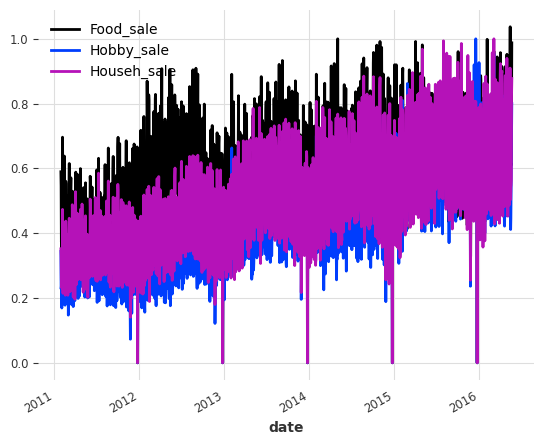

In [ ]:
series_transformed.plot()#ca multi food,hobby,household multi variant
plt.show()

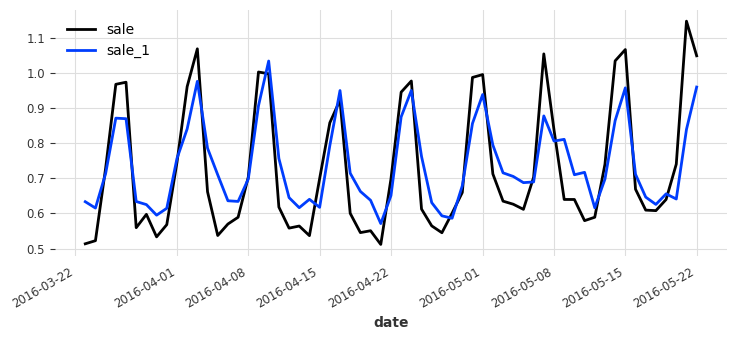

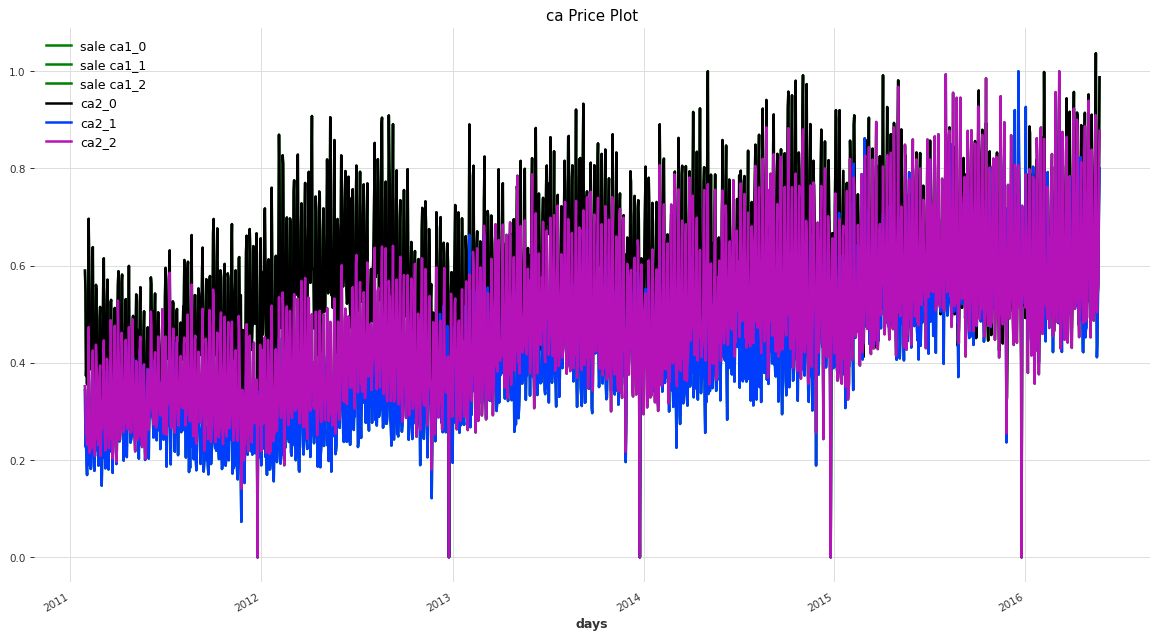

In [ ]:
my_model_B = RNNModel(
    model="LSTM",
    input_chunk_length=24,
    output_chunk_length=12,
    hidden_dim=10,
    n_rnn_layers=4,#increased
    batch_size=32,
    n_epochs=300,#incresead
    dropout=0,#changed
)


In [ ]:
my_model_A = RNNModel(
    model="LSTM",
    input_chunk_length=24,
    output_chunk_length=12,#1
    hidden_dim=40,
    n_rnn_layers=1,#increased
    batch_size=32,
    n_epochs=300,#incresead
    dropout=0,#changed
    optimizer_kwargs={"lr": 1e-4},
    likelihood=None ,
    model_name="CA_RNN",
    log_tensorboard=True,
    random_state=0,
    force_reset=True,
    training_length=40,
    save_checkpoints=True
)

In [ ]:
# RNN = fit_and_pred(my_model_B, train_1transformed, val_1transformed)
# print("MAE (RNN) = {:.2f}".format(mae(val_1transformed, RNN)))

In [ ]:
multi_rnn=my_model_A.fit(train_transformed, val_series=val_transformed, verbose=False)

In [ ]:
best_model_multi = multi_rnn.load_from_checkpoint(model_name="CA_RNN", best=True)

In [ ]:
pred_series=multi_rnn.predict(n=56)

Predicting: 0it [00:00, ?it/s]

In [ ]:
pred_series

<TimeSeries (DataArray) (date: 56, component: 3, sample: 1)>
array([[[0.5085279 ],
        [0.47156525],
        [0.43765473]],

       [[0.46198666],
        [0.44213253],
        [0.408145  ]],

       [[0.5527911 ],
        [0.537478  ],
        [0.51775295]],

       [[0.77110755],
        [0.7437141 ],
        [0.78457516]],

       [[0.80485994],
        [0.67129415],
        [0.80922675]],

...

       [[0.5343988 ],
        [0.5719405 ],
        [0.5412083 ]],

       [[0.7491957 ],
        [0.77886546],
        [0.80706877]],

       [[0.7840609 ],
        [0.71818656],
        [0.8468185 ]],

       [[0.57473516],
        [0.5700894 ],
        [0.57847726]],

       [[0.50760674],
        [0.51851225],
        [0.4926949 ]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2016-03-23 2016-03-24 ... 2016-05-17
  * component  (component) object 'Food_sale' 'Hobby_sale' 'Househ_sale'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
def eval_model(model):
    pred_series = model.predict(n=56)
    plt.figure(figsize=(10, 6))
    series_transformed[-100:].plot(label="actual")
    pred_series[-100:].plot(label="forecast")
    plt.title("mape: {:.2f}".format(mape(pred_series, val_transformed)))
    plt.legend()





In [ ]:
eval_model(multi_rnn)

NameError: name 'eval_model' is not defined

In [ ]:
def eval1_model(model):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    pred_series = model.predict(n=56)
    plt.figure(figsize=(10, 6))
    series_transformed[-100:]['Food_sale'].plot(label="Food-ca1")
    pred_series['Food_sale'].plot(label="forecast f")
    #plt.title("mape: {:.2f}%".format(mape(pred_series, val_transformed)))
    plt.legend()
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize=(10, 6))
    series_transformed[-100:]['Hobby_sale'].plot(label='Hobby')
    pred_series['Hobby_sale'].plot(label="forecast-h")
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize=(10, 6))
    series_transformed[-100:]['Househ_sale'].plot(label='house')
    pred_series['Househ_sale'].plot(label="forecast-hh")
    plt.title("Mape: {:.2f}%".format(mape(pred_series, val_transformed)))

    plt.legend()





Predicting: 0it [00:00, ?it/s]

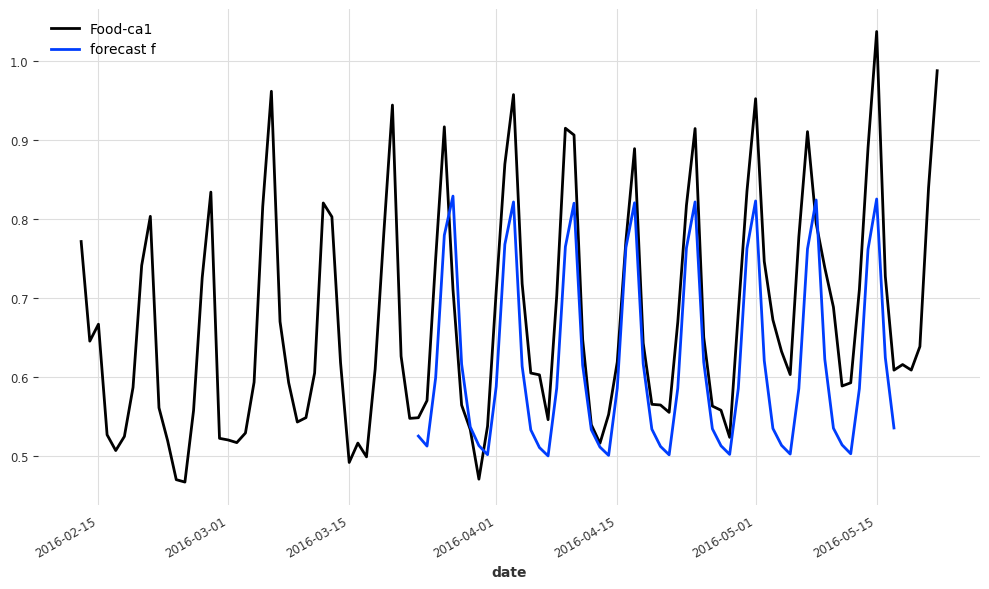

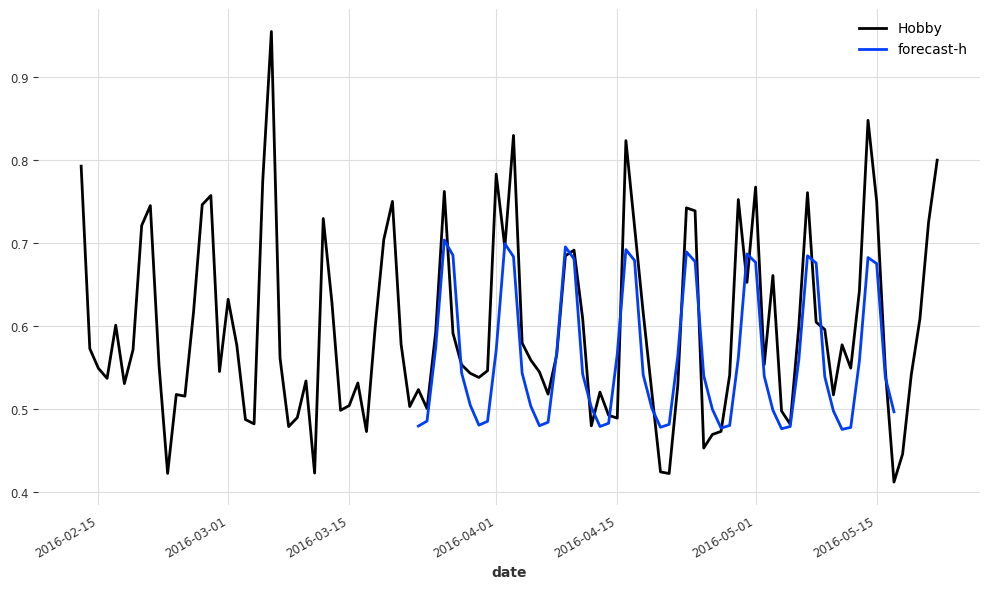

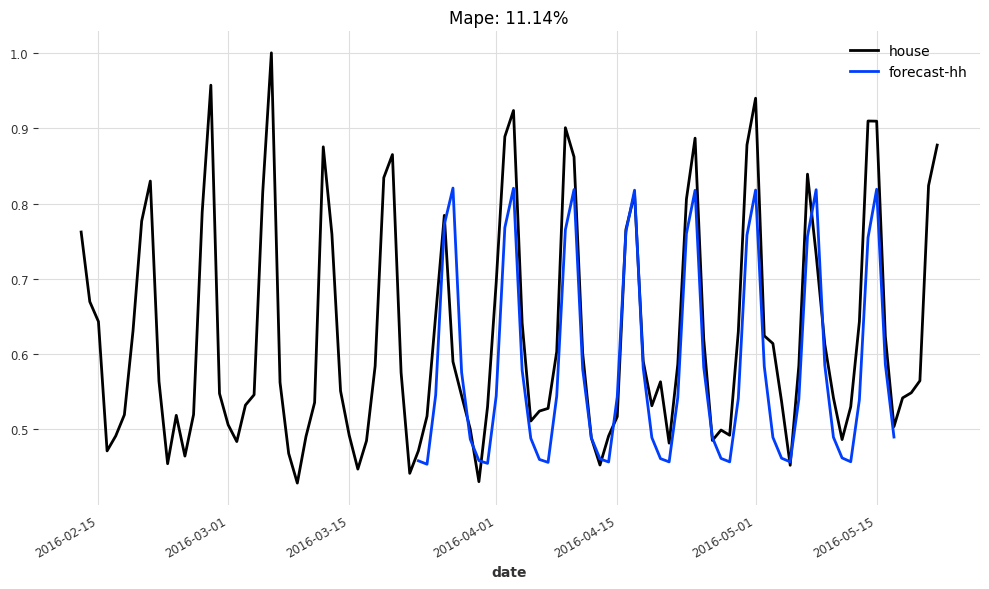

In [ ]:
eval1_model(multi_rnn)

Predicting: 0it [00:00, ?it/s]

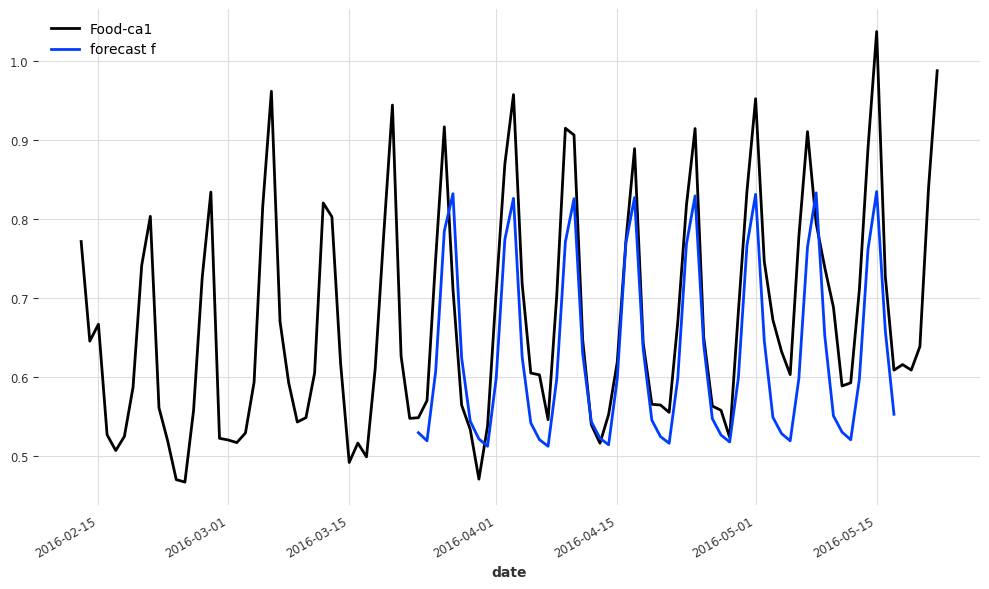

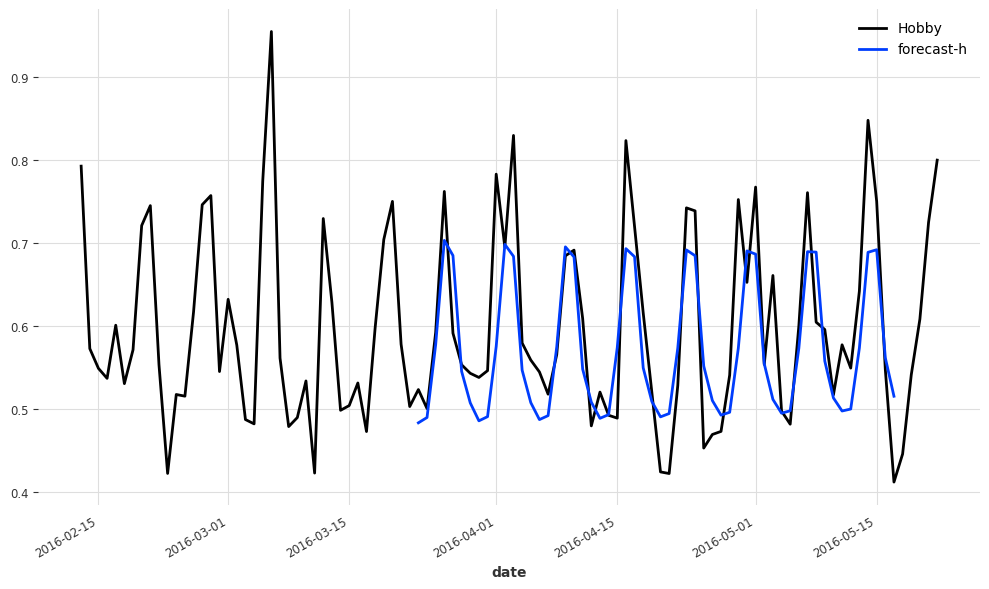

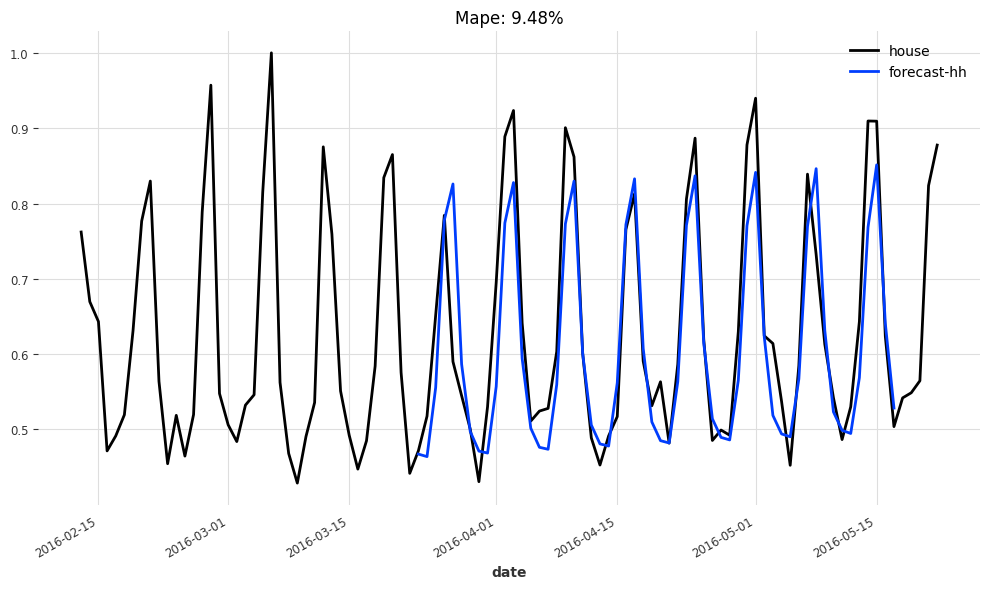

In [ ]:
eval1_model(best_model_multi)

In [ ]:
pred_series = best_model_multi.predict(n=56)

print(
    "SMAPE: {:.2f}%".format(
        smape(pred_series, val_transformed)
    )
)
print(
    "Rmse: {:.2f}".format(
        rmse(pred_series, val_transformed)
    )
)
print(
    "mae: {:.2f}".format(
        mae(pred_series, val_transformed)
    )
)

Predicting: 0it [00:00, ?it/s]

SMAPE: 9.05%
Rmse: 0.08
mae: 0.06


In [ ]:
# Compute the backtest predictions with the two models
pred_series = my_model_B.historical_forecasts(
    series_transformed,
    start=pd.Timestamp("20160322"),
    forecast_horizon=3,
    stride=1,
    retrain=False,
    last_points_only=True,
    verbose=True,
)

pred_series_ets = ExponentialSmoothing(seasonal_periods=7).historical_forecasts(
    series_transformed,
    start=pd.Timestamp("20160322"),
    forecast_horizon=3,
    stride=1,
    retrain=True,
    last_points_only=True,
    verbose=True,
)

  0%|          | 0/60 [00:00<?, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]